複習一些過往的code並慢慢整理自己的codebase，並且養成每日寫data science code的習慣!

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [5]:
# 使用官方資料，只是示意

data = load_wine(as_frame=True)
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [6]:
X = data['data']
y = data['target']

Day1
## Q: 如何知道資料的 row 數以及 column 數、有什麼欄位、多少欄位、如何截取部分的資料等等


In [12]:
# row
print(X.shape[0], len(X))
print(y.shape[0], len(y))

# column
print(X.shape[1])

# 欄位
print(X.columns)

# 多少欄位
print(X.shape[1], len(X.columns))

# 擷取部分資料
print(X.iloc[0, 0])


178 178
178 178
13
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
13 13
14.23


In [13]:
# 也可以直接使用info

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [16]:
# 取得各數值的counts，常使用在類別資料上(可以看到滿平衡的！)

y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Day2
## Q: 找出欄位最大、最小值的「位置」

In [17]:
# 找出每欄位最大值的位置

X.iloc[:, 0].idxmax()

8

In [22]:
print(X.iloc[8, 0])
print(max(X.iloc[:, 0]))

14.83
14.83


In [21]:
# 找出每欄位最小值的位置

X.iloc[:, 0].idxmin()

115

In [23]:
print(X.iloc[115, 0])
print(min(X.iloc[:, 0]))

11.03
11.03


## Q: 最基本的類別特徵轉換方法: one-hot encoding

In [38]:
# 建立簡單的資料來使用
data = {
    'city': ['Taipei', 'LA', 'WC']
}
X = pd.DataFrame(data)
X

,city
0,Taipei
1,LA
2,WC


In [39]:
# 1. 使用pd.get_dummies

pd.get_dummies(X)

,city_LA,city_Taipei,city_WC
0,0,1,0
1,1,0,0
2,0,0,1


In [40]:
# 2. sklearn one-hot encoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit_transform(X)   # 記得這會變成sparse_matrix, 比較節省空間！

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [41]:
# 可以透過toarray取得ndarray，但沒有保持著dataframe
one_hot_encoder.fit_transform(X).toarray() 

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [42]:
# 可以進一步轉換回去，就跟 pd.get_dummies相同了！

pd.DataFrame(one_hot_encoder.fit_transform(X).toarray())

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


Day3
## Q: 找出不同類型的特徵，並操作、觀察

In [44]:
# 建造int、float、object型態的欄位
data = {
    'city': ['Taipei', 'LA', 'WC'],
    'age': [20, 30, 40],
    'height': [1.80, 1.70, 2.0]
}
X = pd.DataFrame(data)
X

,city,age,height
0,Taipei,20,1.8
1,LA,30,1.7
2,WC,40,2.0


In [50]:
# 透過這個語法可以得到df的欄位以及欄位型態
X_dtypes = X.dtypes.reset_index()
X_dtypes

,index,0
0,city,object
1,age,int64
2,height,float64


In [55]:
# 但需要將欄位名稱轉換會比較清楚
X_dtypes.columns = ['count', 'column_type']

# 去得到counts
X_dtypes.groupby('column_type').count().reset_index()

,column_type,count
0,int64,1
1,float64,1
2,object,1


In [58]:
# 藉此，可以根據不同型態去針對處理(如果剛好是這樣的處理方法)
int_columns = []
float_columns = []
object_columns = []

for dtype, column_name in zip(X.dtypes, X.columns):
    if dtype == 'int64':
        int_columns.append(column_name)
    elif dtype == 'float64':
        float_columns.append(column_name)
    else:
        object_columns.append(column_name)
        
print('int:', int_columns)
print('float:', float_columns)
print('object:', object_columns)


int: ['age']
float: ['height']
object: ['city']


**後續就可以針對去進行操作**

Day4
## Q: 找出欄位的統計量

In [61]:
# 平均數
print(X['age'].mean())

# 標準差
print(X['age'].std())

30.0
10.0


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40.]),
 <a list of 10 Patch objects>)

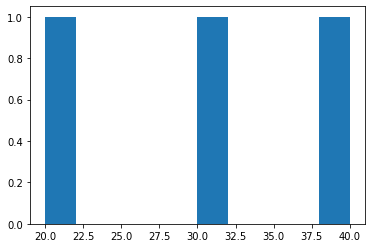

In [66]:
# 任意欄位的直方圖

import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(X['age'])

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([1.7 , 1.73, 1.76, 1.79, 1.82, 1.85, 1.88, 1.91, 1.94, 1.97, 2.  ]),
 <a list of 10 Patch objects>)

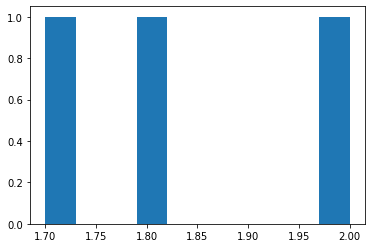

In [67]:
plt.hist(X['height'])

Day4
## Q: outlier

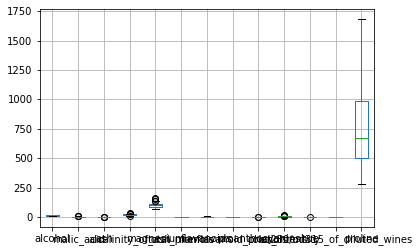

In [69]:
data = load_wine(as_frame=True)
X = data['data']

# 直接取得所有欄位的boxplot(刻度差不多時，適合使用)
X.boxplot()

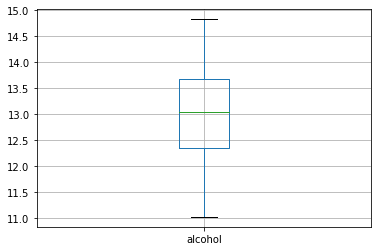

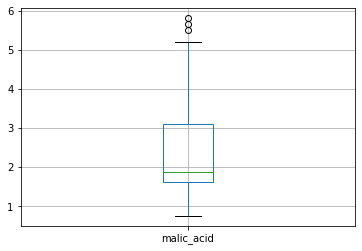

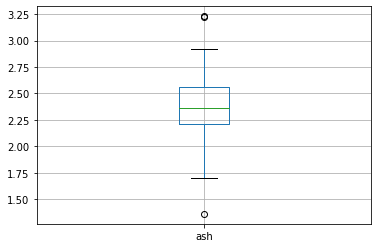

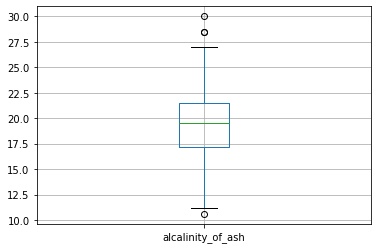

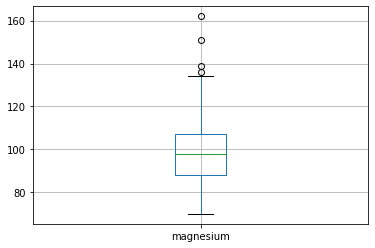

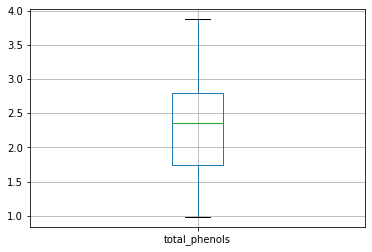

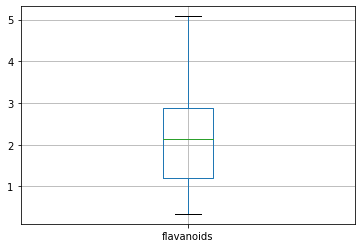

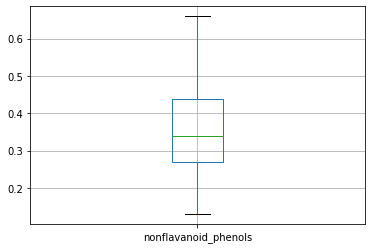

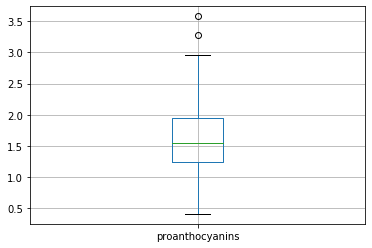

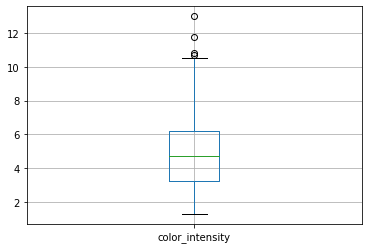

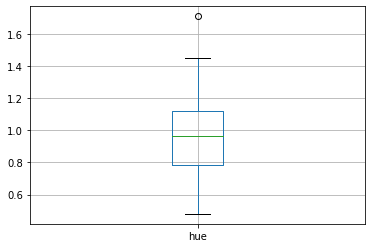

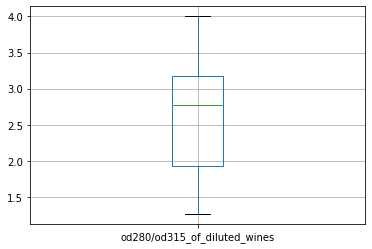

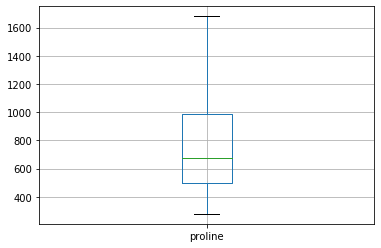

In [72]:
# 取得各自欄位的boxplot

for column in X.columns:
    plt.figure()
    X.boxplot(column=column)

以上可以在視覺上更好直接觀察到眾多數字的概況。

Day5
## Q: 如何看出實際資料累積狀況

Text(0, 0.5, 'ECDF')

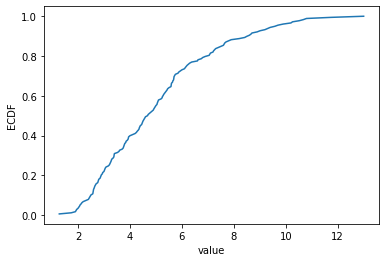

In [80]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
# 以color_intensity 欄位為例

# 1. 取得資料
cdf = X['color_intensity']

# 2. 排序並算出累次數累積資料
cdf = cdf.value_counts().sort_index().cumsum()

# 3. 畫圖
plt.plot(cdf.index, cdf / cdf.max())
plt.xlabel('value')
plt.ylabel('ECDF')

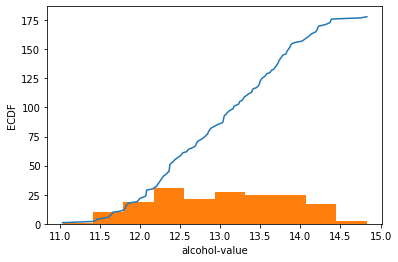

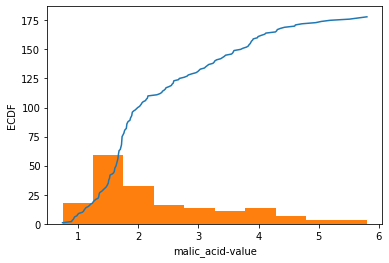

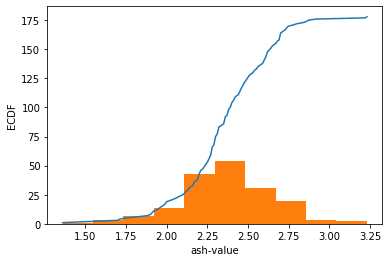

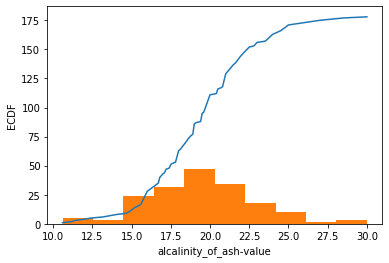

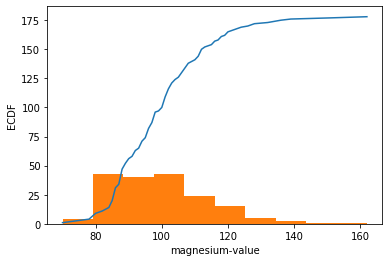

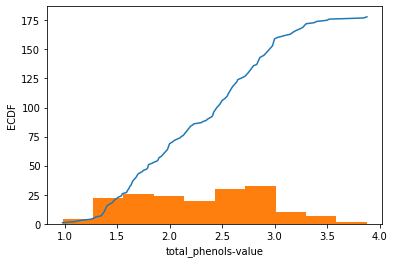

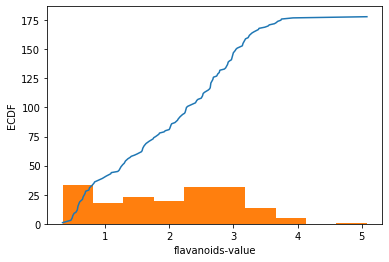

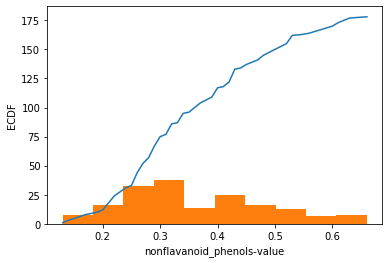

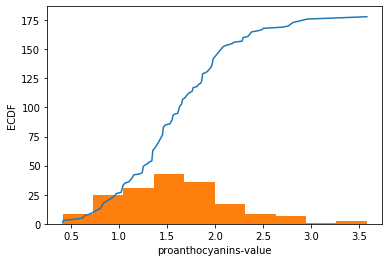

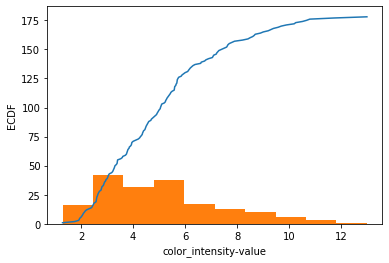

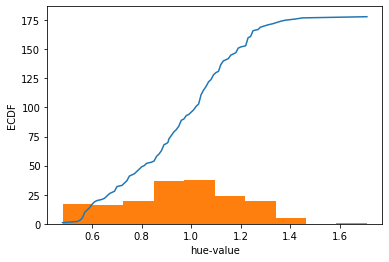

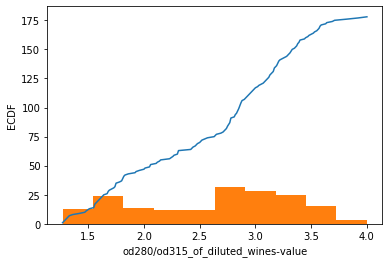

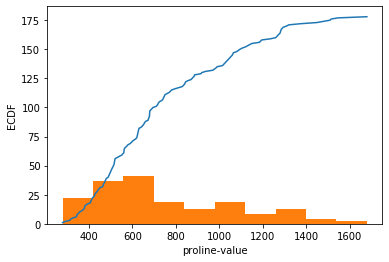

In [84]:
# 畫出各個圖的ecdf

for column in X.columns:
    # 1. 取得資料
    cdf = X[column]
    
    # 2. 排序並計算累積次數
    cdf = cdf.value_counts().sort_index().cumsum()
    
    # 3. 畫圖(搭配hist會更好看出分配)
    plt.figure()
    #plt.plot(cdf.index, cdf / cdf.max())
    plt.plot(cdf.index, cdf)
    plt.hist(X[column])
    plt.xlabel(f'{column}-value')
    plt.ylabel('ECDF')
    

> 可以看出，越像均勻分配的會越靠進對角線；如果次數分配大多在較小數字，曲線會起得更早；反之則是後期才會陡峭。